# Kaggle Project

## Describe Your Dataset

**URL:** https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

**Task:**

Ames, lowa에 있는 집값을 예측하는 것이 최종 목표.
침실의 수, 수영장 면적, 차고 크기 등 보다 세부적인 요소들이 집값에 미치는 영향력을 파악하여 정확한 Saleprice를 예측하는것이 목표


**Datasets**

* Train&Validation dataset: 1460개의 Train Dataset

* Test dataset: 1460개의 Test Dataset

초기 competetion에서 제공해준 데이터에는 train 1460, test 1460개의 데이터가 존재하지만, one hot encoding과정에서 test, train의 데이터가 서로 다르게 encoding 되는현상이 발생해서, 두 데이터를 합쳐 encoding 진행 후 40:30:30 (Train, Validation, Test)로 프로젝트를 진행


**Features(x):**

37 Numerical Data and 43Categorical Data 



**Target(y):**

SalePrice: the property's sale price in dollars.

...

---

## Build Your Model

### Data preprocessing

In [700]:
## codes 
## check working directory 
import pandas as pd
import numpy as np
import os
os.getcwd()

'C:\\Users\\user\\Desktop\\Data\\KTG\\수강한강의내용\\2023머신러닝\\Midterm_project'

In [701]:
## load train & test data
tr_data = pd.read_csv("./house-prices-advanced-regression-techniques/train.csv", sep=',', encoding='euc-kr')
te_data = pd.read_csv("./house-prices-advanced-regression-techniques/test.csv", sep=',', encoding='euc-kr')
tr_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [702]:
te_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.0525
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.3940
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.6836
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.4775
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.0800


In [703]:
## data merge
data = pd.concat([tr_data,te_data], ignore_index=True) # index rebuild
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [704]:
## remove id index
data = data.drop('Id', axis=1)

In [705]:
## check data columns dtype
for i in data.columns:
    if data[i].isnull().sum() != 0:
        print(i + ":",data[i].dtypes, data[i].isnull().sum())

## Na is No  -> Nan to NA class
##data already had NA class: Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu,GarageType, 
##                          GarageFinish, GarageQual,GarageCond, PoolQC, Fence, MiscFeature

## Na is missing value -> remove, if NA count < 100 columns remove row, else remove columns (LotFrontage, GarageYrBlt)
## MSZoning, LotFrontage, Utilities, MasVnrtype, Exterior1st, Exterior2nd, MasVnrArea, Electrical, GarageYrBlt, BsmtFinSF1, 
## BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, KitchenQual, Functional, GarageCars, GarageArea, SaleType

MSZoning: object 4
LotFrontage: float64 486
Alley: object 2721
Utilities: object 2
Exterior1st: object 1
Exterior2nd: object 1
MasVnrType: object 24
MasVnrArea: float64 23
BsmtQual: object 81
BsmtCond: object 82
BsmtExposure: object 82
BsmtFinType1: object 79
BsmtFinSF1: float64 1
BsmtFinType2: object 80
BsmtFinSF2: float64 1
BsmtUnfSF: float64 1
TotalBsmtSF: float64 1
Electrical: object 1
BsmtFullBath: float64 2
BsmtHalfBath: float64 2
KitchenQual: object 1
Functional: object 2
FireplaceQu: object 1420
GarageType: object 157
GarageYrBlt: float64 159
GarageFinish: object 159
GarageCars: float64 1
GarageArea: float64 1
GarageQual: object 159
GarageCond: object 159
PoolQC: object 2909
Fence: object 2348
MiscFeature: object 2814
SaleType: object 1


In [706]:
## LtoFrontage, GarageYrBlt is many missing value, so remove. 
data = data.drop('LotFrontage', axis=1)
data = data.drop('GarageYrBlt', axis=1)

In [707]:
## columns that little missing value, so remove row that has missing value
data = data.dropna(subset=['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd','Electrical',
                             'MasVnrType', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                                'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
                                  'GarageCars', 'GarageArea', 'SaleType'], how='any', axis=0)

In [708]:
##check data processing
for i in data.columns:
    if data[i].isnull().sum() != 0:
        print(i + ":",data[i].dtypes, data[i].isnull().sum())

Alley: object 2687
BsmtQual: object 76
BsmtCond: object 77
BsmtExposure: object 77
BsmtFinType1: object 74
BsmtFinType2: object 75
FireplaceQu: object 1401
GarageType: object 155
GarageFinish: object 156
GarageQual: object 156
GarageCond: object 156
PoolQC: object 2872
Fence: object 2313
MiscFeature: object 2778


In [709]:
## categorical data that have NA class. when data load, NA class change np.NAN, so change value
data = data.replace(np.NaN, "NA")

In [710]:
## missing data check
for i in data.columns:
    if data[i].isnull().sum() != 0:
        print(i + ":",data[i].dtypes, data[i].isnull().sum())

In [711]:
data.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500.0
1,20,RL,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500.0
2,60,RL,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500.0
3,70,RL,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000.0
4,60,RL,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000.0


In [712]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2882 entries, 0 to 2918
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2882 non-null   int64  
 1   MSZoning       2882 non-null   object 
 2   LotArea        2882 non-null   int64  
 3   Street         2882 non-null   object 
 4   Alley          2882 non-null   object 
 5   LotShape       2882 non-null   object 
 6   LandContour    2882 non-null   object 
 7   Utilities      2882 non-null   object 
 8   LotConfig      2882 non-null   object 
 9   LandSlope      2882 non-null   object 
 10  Neighborhood   2882 non-null   object 
 11  Condition1     2882 non-null   object 
 12  Condition2     2882 non-null   object 
 13  BldgType       2882 non-null   object 
 14  HouseStyle     2882 non-null   object 
 15  OverallQual    2882 non-null   int64  
 16  OverallCond    2882 non-null   int64  
 17  YearBuilt      2882 non-null   int64  
 18  YearRemo

In [713]:
## data rows
data_rows = len(data)
data_rows

2882

In [714]:
##one hot encoder object type data
##categorical-data can change 0, 1, 2(Label Encoding) ... or [0, 0, 1, 0 0](One hot Encoding). Label Encoding that has more than 3 class 
##effect the result cause of numbers. so Choose One hot Encoding.
##all categorical data encoding -> 78 col to 301 col
onehot_data = pd.get_dummies(data=data, columns=data.select_dtypes(include = ["object"]).columns)
onehot_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [715]:
## MSSubClass also categorical data, not numerical
## OverallCond, OverallQual are also categorical, but the number mean However, 
## I left it as it is because what each number means is a value that indicates how good the house is.
onehot_data = pd.get_dummies(data=onehot_data, columns=['MSSubClass'])
onehot_data.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,...,0,0,0,0,0,0,0,0,0,0
1,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,...,0,0,0,0,0,0,0,0,0,0
2,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,...,0,0,0,0,0,0,0,0,0,0
3,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,...,1,0,0,0,0,0,0,0,0,0
4,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
##split Data (Train, validation, Test) 4:3:3 

In [716]:
## choose train idx
train_len =  1152##40%
train_idxs = np.random.choice(len(onehot_data), train_len, replace=False)
len(train_idxs)

1152

In [717]:
## choose rest data
val_idxs = [idx for idx in range(len(onehot_data)) if idx not in train_idxs]
len(val_idxs)

1730

In [718]:
## choose test in val_idx
test_idxs = np.random.choice(val_idxs, len(val_idxs)//2, replace=False)
len(test_idxs)

865

In [719]:
for i in test_idxs:
    val_idxs.remove(i)
len(val_idxs)

865

In [720]:
print(train_idxs)
print(val_idxs)
print(test_idxs)

[ 291  848  165 ... 1672 2783 2091]
[4, 7, 22, 24, 26, 27, 34, 50, 55, 57, 58, 63, 64, 70, 72, 74, 76, 83, 87, 88, 89, 90, 105, 113, 116, 125, 128, 133, 144, 146, 149, 150, 154, 160, 168, 169, 170, 171, 174, 176, 177, 180, 183, 190, 192, 194, 199, 200, 203, 205, 207, 208, 209, 211, 212, 213, 218, 221, 224, 227, 228, 231, 235, 236, 242, 248, 249, 250, 258, 264, 266, 267, 273, 276, 278, 280, 281, 284, 288, 300, 304, 305, 307, 314, 315, 316, 320, 325, 327, 330, 332, 333, 338, 340, 343, 345, 350, 352, 356, 357, 358, 360, 362, 363, 365, 368, 370, 371, 375, 381, 382, 386, 387, 388, 389, 390, 394, 395, 398, 403, 405, 412, 418, 424, 426, 431, 438, 440, 446, 447, 451, 459, 465, 466, 467, 468, 469, 471, 480, 481, 482, 488, 489, 491, 493, 499, 503, 510, 511, 514, 515, 521, 522, 526, 528, 533, 535, 539, 540, 541, 543, 547, 548, 550, 552, 554, 555, 564, 565, 568, 569, 571, 574, 575, 576, 581, 582, 583, 584, 586, 588, 589, 590, 592, 599, 602, 605, 610, 612, 616, 627, 628, 629, 633, 636, 638, 646, 64

In [721]:
## data for train & val & test
data = onehot_data[onehot_data.columns].values

In [722]:
train_data = data[train_idxs]
val_data = data[val_idxs]
test_data = data[test_idxs]

In [723]:
## target columns check
for i in range(0, 316):
    if "SalePrice" == onehot_data.columns[i]:
        print(i)

33


### Model Construction

In [724]:
## codes
## LinearR, DTR 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [725]:
model_lr = LinearRegression(fit_intercept=True) # Loss function is fixed to MSE.

In [726]:
model_dt = DecisionTreeRegressor(#criterion='squared_error', # latest version {“squared_error”, “absolute_error”, ...}
                                 criterion='mse', # v=0.24 {“mse”, “mae”, ...}
                                 splitter='best', # {“best”, “random”}
                                 max_depth=30,
                                 random_state=0)

In [758]:
## Neural Network
import torch
import torch.nn as nn
import torch.optim as optim

In [759]:
## 315 weight Network
model_nn = nn.Linear(315, 1, bias = True)
model_nn.weight

Parameter containing:
tensor([[-0.0356,  0.0408,  0.0099,  0.0556,  0.0365,  0.0480, -0.0108,  0.0282,
          0.0449,  0.0468,  0.0036,  0.0542, -0.0517, -0.0134,  0.0106, -0.0226,
          0.0505,  0.0498,  0.0497,  0.0328, -0.0460, -0.0462,  0.0179,  0.0304,
          0.0450,  0.0026,  0.0034,  0.0094,  0.0454,  0.0112, -0.0511,  0.0478,
         -0.0004, -0.0375,  0.0548, -0.0453,  0.0390, -0.0446, -0.0449,  0.0001,
         -0.0100, -0.0382, -0.0238, -0.0412,  0.0148,  0.0240, -0.0235,  0.0273,
          0.0540, -0.0403,  0.0121, -0.0106, -0.0557,  0.0404, -0.0023, -0.0102,
          0.0327, -0.0234, -0.0492, -0.0011, -0.0013, -0.0204,  0.0116, -0.0262,
          0.0306,  0.0384,  0.0235, -0.0408,  0.0563,  0.0461, -0.0532,  0.0123,
         -0.0298, -0.0298, -0.0128, -0.0371,  0.0234,  0.0388,  0.0175, -0.0218,
         -0.0004, -0.0257,  0.0112, -0.0203,  0.0509, -0.0337,  0.0132, -0.0543,
         -0.0318, -0.0180, -0.0099,  0.0371,  0.0382, -0.0375, -0.0447, -0.0005,
      

In [760]:
## loss function
loss = nn.MSELoss()
optimizer = optim.SGD(model_nn.parameters(), lr=0.0000000005)

### Train Model & Select Model

In [761]:
## codes
models = [model_lr,model_dt]

In [762]:
def mse_loss(pre, y):
    return ((pre-y)**2).mean()

In [805]:
x1 = train_data[:, 0:33]
x2 = train_data[:, 34:316]
x = np.concatenate((x1,x2), axis=1)
y = train_data[:, 33]

print(x.shape, y.shape)

(1152, 315) (1152,)


In [764]:
for step in range(300000):
    pre = model_nn(torch.Tensor(x))
    cost = loss(pre, torch.Tensor(y).unsqueeze(1))
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()


In [765]:
model_nn.weight

Parameter containing:
tensor([[ 6.6006e-01,  2.0612e+00,  1.0500e+00,  3.1716e+01,  1.6927e+01,
          2.1233e+01,  1.0790e+01,  9.6177e-01,  3.8210e+00,  1.5604e+01,
          4.9819e+00,  1.2914e+01,  1.9041e+01,  3.6968e+01, -1.2338e-01,
          9.9971e-02,  3.2984e-01, -7.4302e-02,  7.8389e-02, -3.7374e-01,
          3.4091e-01,  3.2338e-01,  3.2051e-01,  2.4809e+01,  1.6951e+01,
         -5.3313e+00, -2.3341e+01,  2.2408e+01,  8.4359e+00,  2.2516e+00,
         -2.2196e+00,  1.8284e+00, -1.3706e+01, -8.9951e-02,  8.5142e-02,
         -6.5291e-02,  2.9000e-01, -2.6022e-01, -1.0121e-01,  4.9579e-02,
         -6.5878e-02,  6.2157e-02, -7.4873e-02,  2.2161e-02,  4.6298e-02,
          4.2643e-02, -1.4376e-01, -1.4092e-01,  5.5582e-02, -3.0945e-02,
          1.6252e-01, -7.8990e-03, -6.5037e-02,  5.8995e-03,  2.3157e-02,
          5.4198e-02,  5.1725e-02, -1.0436e-01,  4.1573e-02, -7.6564e-02,
         -2.3185e-02,  1.0760e-02,  1.7041e-02, -7.1636e-02, -5.8973e-02,
          4.9246

In [766]:
import matplotlib.pyplot as plt
%matplotlib inline

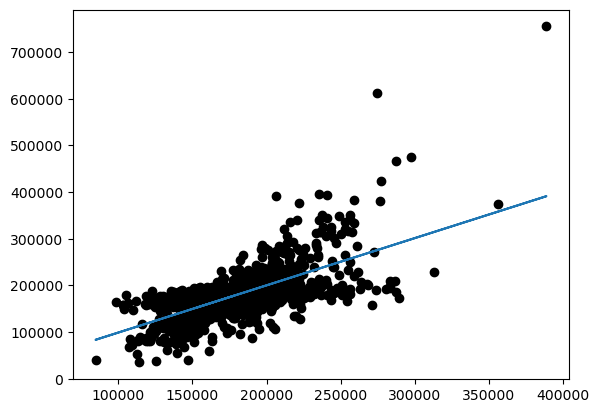

m is  1.0111459337827486


In [808]:
## NN train graph
nn_pred_y = model_nn(torch.Tensor(x))

plt.scatter(nn_pred_y.detach().numpy(), y, c='k')
a = nn_pred_y.detach().numpy()
m, b = np.polyfit(a[:,0], y, 1)
plt.plot(a[:,0], m*a[:,0] + b)
#그래프 출력
plt.show()
print("m is ", m)

In [768]:
for model in models:
    model.fit(x, y)
    pre = model.predict(x)
    loss_value = mse_loss(pre, y)
    
    print(model, loss_value)

LinearRegression() 1071921209.0236408
DecisionTreeRegressor(criterion='mse', max_depth=30, random_state=0) 0.0


D:\ProgramData\Anaconda3\envs\torch_kaggle_midterm\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


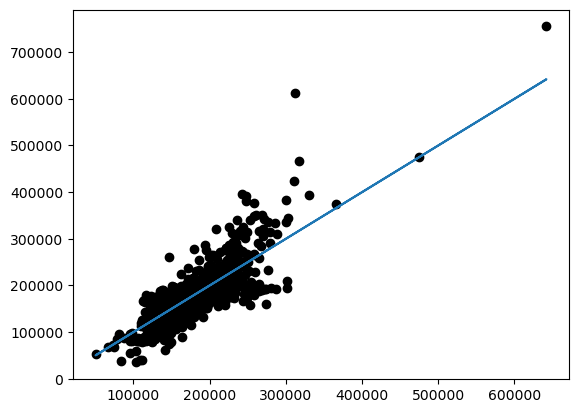

m is  1.0000000000000098


In [806]:
##models = [model_lr] train graph
plt.scatter(model_lr.predict(x), y, c='k')
a = model_lr.predict(x)
m, b = np.polyfit(a, y, 1)
plt.plot(a, m*a + b)

#그래프 출력
plt.show()
print("m is ", m)

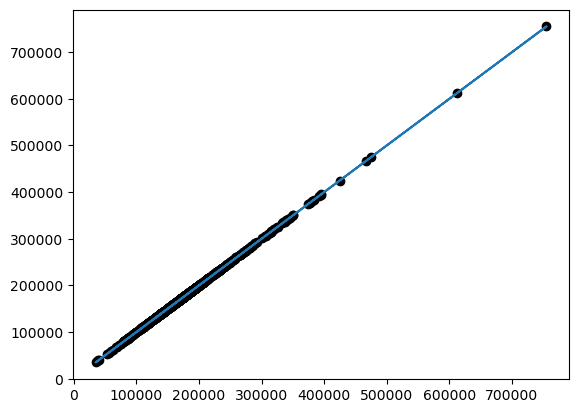

m is  1.0000000000000002


In [807]:
##models = [model_lr,model_dt] train graph
plt.scatter(model_dt.predict(x), y, c='k')

a = model_dt.predict(x)
m, b = np.polyfit(a, y, 1)
plt.plot(a, m*a + b)

#그래프 출력
plt.show()
print("m is ", m)

In [801]:
## valdiate
x1 = val_data[:, 0:33]
x2 = val_data[:, 34:316]
x = np.concatenate((x1,x2), axis=1)
y = val_data[:, 33]

print(x.shape, y.shape)

(865, 315) (865,)


In [772]:
for model in models:
    pre = model.predict(x)   
    loss_value = mse_loss(pre, y)

In [773]:
print("w:", model_lr.coef_, ", b:", model_lr.intercept_)

w: [ 7.11779511e-01  2.30910837e+03  6.37473145e+03  3.82658406e+02
 -1.16087481e+02  1.14640742e+01  6.68724841e+00  2.12373192e+01
 -3.44320322e-01  2.75802289e+01 -1.80650136e+01  1.79296577e+01
  3.10535944e+01  3.09183409e+01 -5.10572863e+03  5.82529536e+03
 -8.08528587e+02 -6.37413647e+03 -2.57509935e+03 -3.38181438e+04
  7.21821135e+03  8.66934316e+03 -9.18715614e+02  1.41902550e+01
  3.01547152e+00 -3.88874592e+00  4.48092813e+00  2.14659161e+02
  7.63596001e+00  3.55246572e+01  2.02797413e+01  1.28563853e+03
  9.55173176e+02 -2.40255228e+04  1.08237664e+04 -3.77108907e+02
  1.06694014e+04  2.90946391e+03 -1.07069693e+04  1.07069693e+04
  6.53301703e+03  9.50783994e+02 -7.48380102e+03 -4.48407382e+03
 -4.19636966e+03  9.18789379e+03 -5.07450304e+02 -3.99735066e+03
 -2.19834696e+03  7.66621030e+02  5.42907659e+03  2.82577875e+04
 -2.82577875e+04 -5.21008343e+03 -5.62609344e+03 -3.67970447e+03
  2.20264935e+04 -7.51061221e+03  8.68794329e+03  5.93051097e+03
 -1.46184543e+04 -4.66

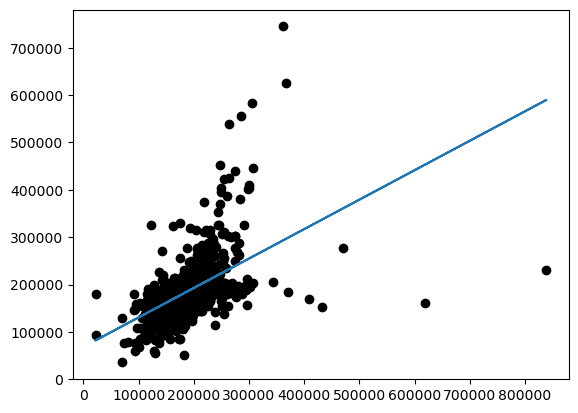

m is  0.6220143018671721


In [804]:
##models = [model_lr] validation graph
plt.scatter(model_lr.predict(x), y, c='k')
a = model_lr.predict(x)
m, b = np.polyfit(a, y, 1)
plt.plot(a, m*a + b)

#그래프 출력
plt.show()
print("m is ", m)

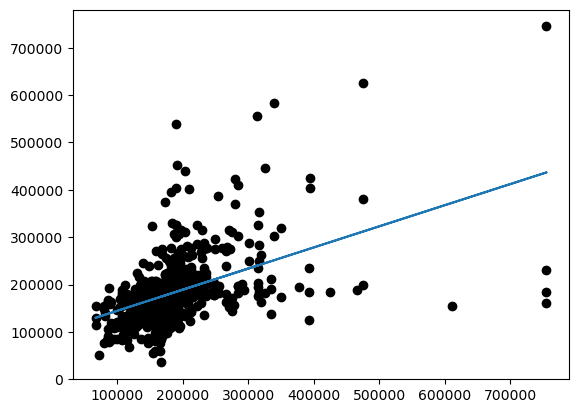

m is  0.44629662503383183


In [803]:
##models = [model_lr,model_dt] validation graph
plt.scatter(model_dt.predict(x), y, c='k')

a = model_dt.predict(x)
m, b = np.polyfit(a, y, 1)
plt.plot(a, m*a + b)

#그래프 출력
plt.show()
print("m is ", m)

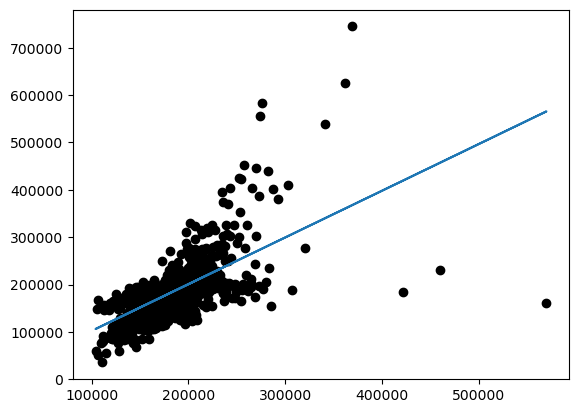

m is  0.9868157084957901


In [802]:
## NN validation graph
nn_pred_y = model_nn(torch.Tensor(x))

plt.scatter(nn_pred_y.detach().numpy(), y, c='k')
a = nn_pred_y.detach().numpy()
m, b = np.polyfit(a[:,0], y, 1)
plt.plot(a[:,0], m*a[:,0] + b)
#그래프 출력
plt.show()
print("m is ", m)

---

## Performance

In [777]:
## codes

## test
x1 = test_data[:, 0:33]
x2 = test_data[:, 34:316]
x = np.concatenate((x1,x2), axis=1)
y = test_data[:, 33]

print(x.shape, y.shape)

(865, 315) (865,)


In [778]:
## test LinearR, DTR
for model in models:
    pre = model.predict(x)   
    loss_value = mse_loss(pre, y)
    
    print(model, loss_value)

LinearRegression() 2079922772.729592
DecisionTreeRegressor(criterion='mse', max_depth=30, random_state=0) 3307676276.319862


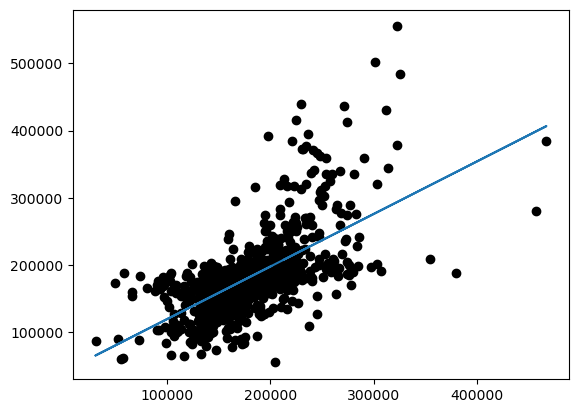

m is  0.783307563476203


In [799]:
##models = [model_lr] test graph
plt.scatter(model_lr.predict(x), y, c='k')
a = model_lr.predict(x)
m, b = np.polyfit(a, y, 1)
plt.plot(a, m*a + b)

#그래프 출력
plt.show()
print("m is ", m)

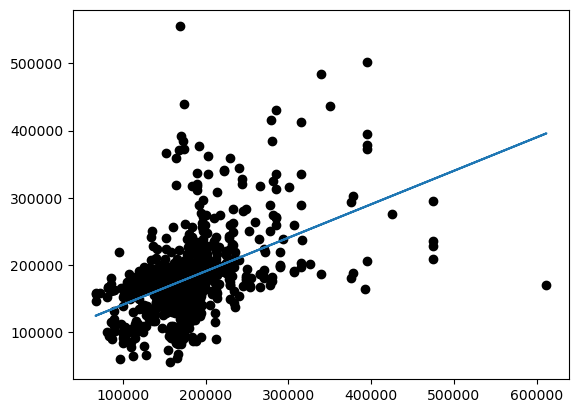

m is  0.4984376479132832


In [797]:
##models = [model_lr,model_dt] test graph
plt.scatter(model_dt.predict(x), y, c='k')

a = model_dt.predict(x)
m, b = np.polyfit(a, y, 1)
plt.plot(a, m*a + b)

#그래프 출력
plt.show()
print("m is ", m)

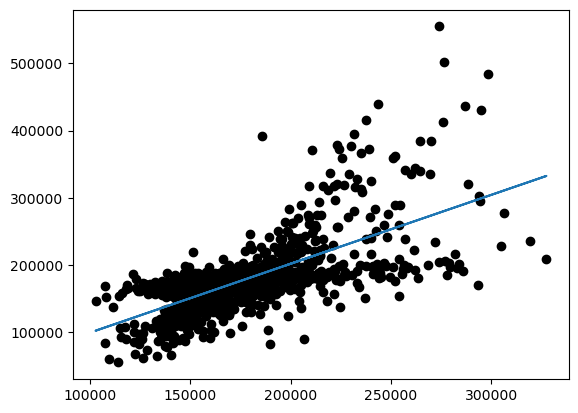

m is  1.0260904806351854


In [798]:
## NN test graph
nn_pred_y = model_nn(torch.Tensor(x))

plt.scatter(nn_pred_y.detach().numpy(), y, c='k')
a = nn_pred_y.detach().numpy()
m, b = np.polyfit(a[:,0], y, 1)
plt.plot(a[:,0], m*a[:,0] + b)
#그래프 출력
plt.show()
print("m is ", m)

array([198071.1  , 214575.   , 211405.02 , 153901.75 , 164327.58 ,
       159281.89 , 197909.97 , 144636.75 , 143301.25 , 172391.67 ,
       137700.27 , 160520.39 , 136051.52 , 116224.82 , 229862.3  ,
       156480.   , 151199.1  , 111629.41 , 153818.83 , 182902.97 ,
       158473.53 , 159687.05 , 177635.42 , 128103.84 , 178868.92 ,
       143389.31 , 187116.61 , 147239.9  , 176707.58 , 143233.   ,
       181982.31 , 157467.72 , 144602.   , 147441.75 , 109612.57 ,
       212514.05 , 129929.18 , 200564.3  , 205103.12 , 294808.06 ,
       141040.2  , 159693.33 , 183954.47 , 171994.36 , 146472.58 ,
       167329.36 , 158651.17 , 198957.9  , 179222.77 , 189116.23 ,
       286712.8  , 102880.84 , 180252.   , 202073.38 , 197147.14 ,
       175908.17 , 138942.3  , 235054.67 , 169587.97 , 168938.77 ,
       216379.69 , 164302.77 , 192693.9  , 134993.25 , 202306.66 ,
       157842.4  , 172282.22 , 146714.4  , 146100.17 , 135004.55 ,
       160781.88 , 142441.42 , 282017.47 , 176751.38 , 205352.

# The results explains

SalesPrice는 현재 데이터에서 70만까지 나타난 숫자로 매우 큰 값이다. 때문에 mse값이 매우 크게 나와 수치로는 이게 얼마나 학습이 잘된지 안된지 확인이 불가능하여 그래프를 통해 선형성을 확인하였다.

Test직후, 그래프를 살펴보면, 3개의 모델 모두 기울기가 1에 근접하게 나오며 특히 DTR은 완벽한 선형성을 보여준다. 하지만 이는 validation과 Test데이터를 통해 확인한 결과 LinearR과 DecisionTree의 기울기는 크게 변동이 생겼으며 특히 DTR은 Overfit이었다는것을 확인할 수 있었다. 신경망 네트워크 NN은 일부 데이터가 튀긴 했지만, 30만원 이하의 가격대에서 여전히 선형성을 유지했다. 

Train Data와 validation, Test 모두 비슷한 양상을 보이는 모델은 신경망 네트워크로 보다 적절한 초기값과 학습비율, 더 많은 데이터가 존재한다면 정확한 모델이 될 수 있을거라 예상한다.

모델의 정확도가 낮은 이유는 아무래도 분석에 사용한 파라미터가 많아서 학습에 방해가 됬다고 판단이 든다.
실제로 이런 분석에서는 PCA같은 분석을 통해 연관성이 많이 떨어지는 class는 제거한 후, 분석을 진행하는 경우가 많다.
하지만 이번 프로젝트에서는 이러한 데이터들을 다루고 학습에 사용하기 위한 전처리과정을 연습하기 위해 missing value가 많은 class를 제외하고는 모두 학습에 사용했다. 

kaggle competition에 많은 상금들이 있는것을 보고 모델 돌리면 다 나올텐데 왜 많은 상금이 걸려있나 했는데, 막상 데이터를 사용해보니 생각보다 정확한 모델을 만드는게 어렵다는것을 새삼 느끼는 과제였다.

